In [1]:
# Random Forest and Logistic Regression Model Training

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the processed train and test datasets
train_file = "/content/processed_train.csv"
test_file = "/content/processed_test.csv"
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [3]:
# Prepare the data for training
X = train_df.drop(columns=['TARGET_5Yrs', 'Id'])
y = train_df['TARGET_5Yrs']

In [4]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Logistic Regression Model Training
log_reg = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')

In [6]:
# Perform Grid Search to find the best parameters for Logistic Regression
grid_search_lr.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
105 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='roc_auc', verbose=2)

In [7]:
# Get the best parameters and train the final Logistic Regression model
best_params_lr = grid_search_lr.best_params_
print(f"Best Parameters for Logistic Regression: {best_params_lr}")

best_log_reg = grid_search_lr.best_estimator_
best_log_reg.fit(X_train, y_train)

Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}


LogisticRegression(C=100, max_iter=1000, random_state=42, solver='saga')

In [8]:
# Evaluate the Logistic Regression model
val_preds_lr = best_log_reg.predict(X_val)
val_probs_lr = best_log_reg.predict_proba(X_val)[:, 1]

In [9]:
# ROC AUC Score for Logistic Regression
roc_auc_lr = roc_auc_score(y_val, val_probs_lr)
print(f"Logistic Regression Model ROC AUC: {roc_auc_lr:.4f}")

Logistic Regression Model ROC AUC: 0.7170


In [10]:
# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_val, val_preds_lr)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

Confusion Matrix for Logistic Regression:
[[   8  255]
 [   7 1330]]


Best Parameters for Logistic Regression:

The optimal parameters for Logistic Regression were identified as: C=100, penalty='l2', and solver='saga'.
ROC AUC Score for Logistic Regression:

The ROC AUC score of 0.7170 indicates that the Logistic Regression model has moderate discriminatory ability between the classes.
Confusion Matrix for Logistic Regression: Image Below

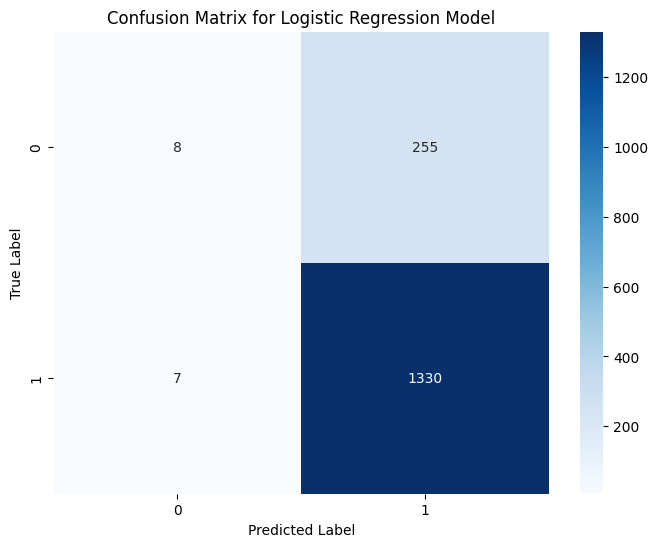

In [11]:
# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The confusion matrix shows a high number of False Negatives (255) compared to True Positives (8), indicating the model struggles to correctly identify the positive class (label 0). However, it performs well in identifying True Negatives (1330).

In [12]:
# Classification Report for Logistic Regression
class_report_lr = classification_report(y_val, val_preds_lr)
print("Classification Report for Logistic Regression:")
print(class_report_lr)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.53      0.03      0.06       263
           1       0.84      0.99      0.91      1337

    accuracy                           0.84      1600
   macro avg       0.69      0.51      0.48      1600
weighted avg       0.79      0.84      0.77      1600



Precision: The model's precision for the positive class (1) is high (0.84), meaning most of the positive predictions are correct, while the precision for the negative class (0) is low (0.53).

Recall: The recall for the negative class is very low (0.03), indicating poor ability to identify true negatives, while recall for the positive class is very high (0.99).

F1 Score: The F1 score for class 0 is very low (0.06), reflecting poor balance between precision and recall, while the F1 score for class 1 is high (0.91).

Accuracy: The overall accuracy is 84%, but due to class imbalance, recall and F1 score for class 0 are considerably lower, showing limitations in detecting the minority class.